# COVID-19 Exploratory Data Analysis

In [99]:
# IMPORTS
import os
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as ticker

In [2]:
def is_date(col_name:str) -> bool:
  """Boolean function to check if a column name string is a date using regex
  """
  r = re.compile(".+/.+/.+")
  return True if r.match(col_name) else False

In [3]:
def load_time_series_data(file_path):
  """Custom loader that converts date strings to datetime columns
  """
  df = pd.read_csv(DATA_DIR + "/" + file_path)
  df.columns = [
    pd.to_datetime(col) if is_date(col) else col for col in df.columns
  ]
  return df

In [101]:
@ticker.FuncFormatter
def millions(x, pos):
    return "%.1f M" % (x/1E6)


In [4]:
# DATA PATHS
DATA_DIR = "/Users/jai/Projects/csse_covid_19_time_series"
CSV_FILES = (
    'time_series_covid19_confirmed_global.csv',
    'time_series_covid19_confirmed_US.csv',
    'Errata.csv',
    'time_series_covid19_recovered_global.csv',
    'time_series_covid19_deaths_global.csv',
    'time_series_covid19_deaths_US.csv'
)


In [5]:
# READ IN DATA FILES
(
  global_cases, global_deaths, global_recovered,
  us_cases, us_deaths, errata, 
) = (
  load_time_series_data(file_path) for file_path in CSV_FILES
)


In [6]:
# Let's start looking at data!

In [7]:
global_cases.head()

,Province/State,Country/Region,Lat,Long,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,...,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,2022-04-11 00:00:00,2022-04-12 00:00:00,2022-04-13 00:00:00
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,177897,177932,177974,177974,177974,177974,177974,178141,178257,178295
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,273913,274000,274055,274108,274136,274191,274219,274219,274272,274320
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265694,265699,265705,265707,265714,265720,265724,265727,265730,265731
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40024,40024,40024,40328,40328,40328,40328,40328,40328,40709
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [8]:
global_cases.columns

Index([   'Province/State',    'Country/Region',               'Lat',
                    'Long', 2020-01-22 00:00:00, 2020-01-23 00:00:00,
       2020-01-24 00:00:00, 2020-01-25 00:00:00, 2020-01-26 00:00:00,
       2020-01-27 00:00:00,
       ...
       2022-04-04 00:00:00, 2022-04-05 00:00:00, 2022-04-06 00:00:00,
       2022-04-07 00:00:00, 2022-04-08 00:00:00, 2022-04-09 00:00:00,
       2022-04-10 00:00:00, 2022-04-11 00:00:00, 2022-04-12 00:00:00,
       2022-04-13 00:00:00],
      dtype='object', length=817)

In [9]:
# We have country, state, lat, long, and then a lot of time series columns (~800 dates)
# Let's take a look at region Nulls

In [10]:
global_cases[global_cases["Province/State"].notnull()]

,Province/State,Country/Region,Lat,Long,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,...,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,2022-04-11 00:00:00,2022-04-12 00:00:00,2022-04-13 00:00:00
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,81821,81821,82970,85177,86102,86887,87634,88543,89510,90567
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,1914764,1938880,1961044,1981387,1998901,2014552,2028020,2043185,2061416,2079216
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,51849,52334,52847,53364,53364,54226,54601,54601,55612,56146
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,811525,820041,831012,841085,849753,856879,863536,871410,880572,889316
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,284451,290824,297732,304102,308879,314508,320753,325154,330140,337601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,28890,28890,28890,30169,30169,30169,30169,30169,30169,30169
269,Jersey,United Kingdom,49.213800,-2.135800,0,0,0,0,0,0,...,46779,47156,47367,47561,47746,47746,47746,47881,48162,48305
270,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,175,175,175,176,176,176,176,176,176,176
271,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [11]:
global_cases[global_cases["Province/State"].notnull()]["Country/Region"].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

We have 89 sub-regions, and 8 regions with sub-regions.
We now need to think about how we're going to handle this data.  
  1. If we want to look at unique states/provinces, we only have 8 regions to pull from, but 89 data points. We have enough data, but unfortunately are missing out on the global scope.  
  2. If we want to look at unique countries, we need to aggregate the data from subregions. Our total locations will be reduced. 
  3. If we don't care about statehood (perhaps if we are interested in policy) and are instead more interested in geography, we can instead reformulate our data to look at _location_. We can achieve greater granularity by identifying location by province/state and if not then country/region. 

I'll create sets for both (2) and (3). We can start looking at location-based data, and revisit (2) if we are interested in considering statehood. 

In [12]:
# Grouping data by country/region
global_cases_by_region = global_cases.groupby("Country/Region").sum()

# Grouping data by location (adding a new column)
location = global_cases["Province/State"].fillna(global_cases["Country/Region"])
global_cases.insert(0, "Location", location)

global_cases.head()

,Location,Province/State,Country/Region,Lat,Long,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,...,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,2022-04-11 00:00:00,2022-04-12 00:00:00,2022-04-13 00:00:00
0,Afghanistan,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,...,177897,177932,177974,177974,177974,177974,177974,178141,178257,178295
1,Albania,NaN,Albania,41.15330,20.168300,0,0,0,0,0,...,273913,274000,274055,274108,274136,274191,274219,274219,274272,274320
2,Algeria,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,...,265694,265699,265705,265707,265714,265720,265724,265727,265730,265731
3,Andorra,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,...,40024,40024,40024,40328,40328,40328,40328,40328,40328,40709
4,Angola,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [13]:
# Lets plot total global cases

In [76]:
cum_cases = global_cases.select_dtypes(int).sort_index().sum()
daily_cases = cum_cases.diff()

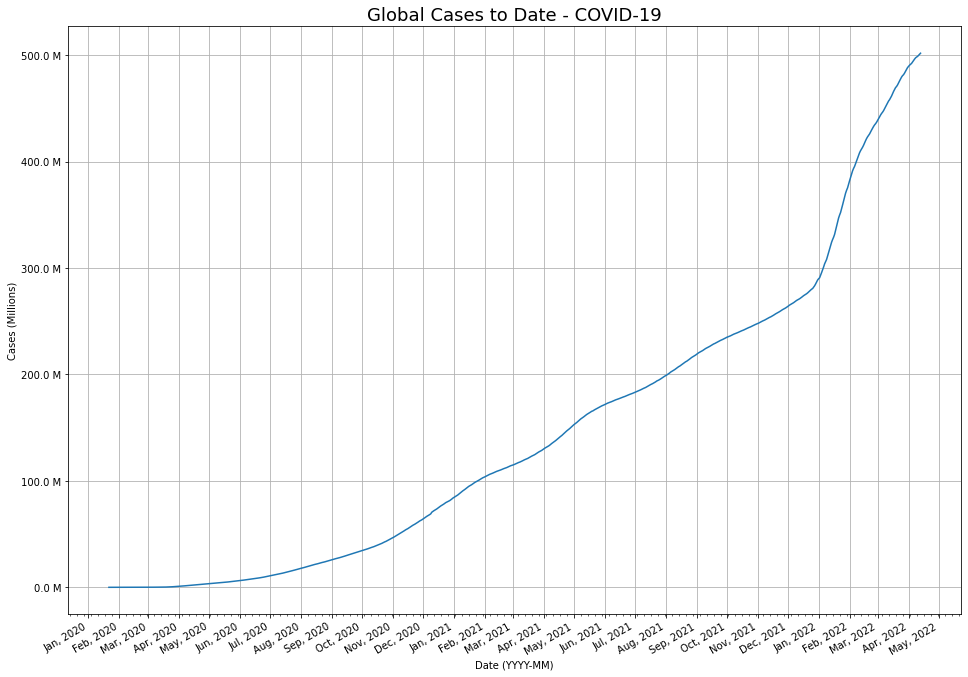

In [103]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(cum_cases)
ax.grid("on")
ax.set_title("Global Cases to Date - COVID-19", fontsize=18)
ax.set_xlabel("Date (YYYY-MM)"),
ax.set_ylabel("Cases (Millions)"),
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))
ax.yaxis.set_major_formatter(millions)
plt.gcf().autofmt_xdate()
plt.show()


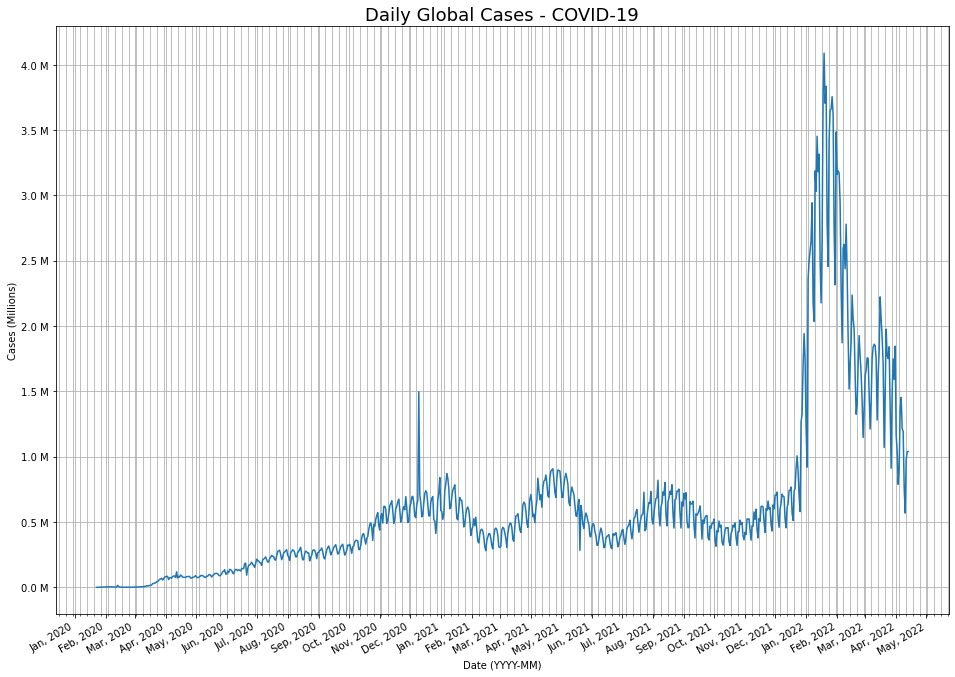

In [105]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(daily_cases)
ax.grid("on", "both")
ax.set_title("Daily Global Cases - COVID-19", fontsize=18)
ax.set_xlabel("Date (YYYY-MM)"),
ax.set_ylabel("Cases (Millions)"),
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))
ax.yaxis.set_major_formatter(millions)
plt.gcf().autofmt_xdate()
plt.show()


In [97]:
# When i turn on the minor weekly ticks, you can see that the reporting cycles on a weekly basis. SHould we do some smoothing? Smoothing window based on sampling law? Or just report based on past 7 days?

In [106]:
daily_cases

2020-01-22          NaN
2020-01-23        100.0
2020-01-24        287.0
2020-01-25        493.0
2020-01-26        683.0
                ...    
2022-04-09     768321.0
2022-04-10     568317.0
2022-04-11     975189.0
2022-04-12    1036861.0
2022-04-13    1039871.0
Length: 813, dtype: float64

In [151]:
def first_day_of_week(datetime_obj):
  iso_cal = datetime_obj.isocalendar()
  return pd.to_datetime(iso_cal.year, format='%Y') + \
      pd.to_timedelta(f"{iso_cal.week*7} days")


In [152]:
weekly_cases = daily_cases.groupby(first_day_of_week).sum()

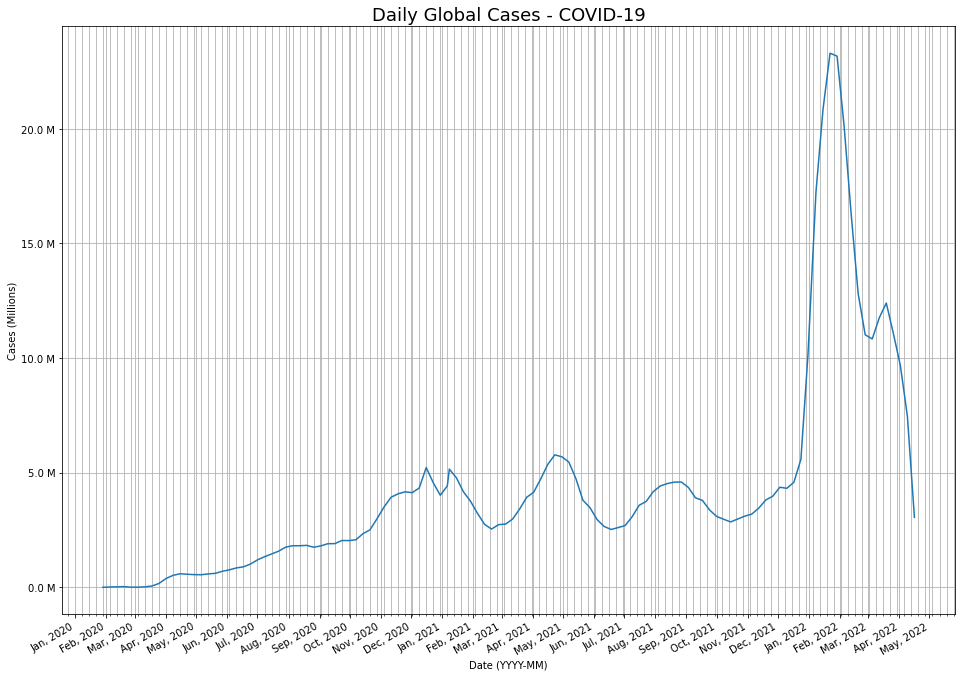

In [154]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.plot(weekly_cases)
ax.grid("on", "both")
ax.set_title("Weekly Global Cases - COVID-19", fontsize=18)
ax.set_xlabel("Date (YYYY-MM)"),
ax.set_ylabel("Cases (Millions)"),
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))
ax.yaxis.set_major_formatter(millions)
plt.gcf().autofmt_xdate()
plt.show()
